# Regression model selection

In [1]:
from sklearn.datasets import make_regression

In [2]:
X, Y = make_regression(n_samples=1000, n_features=5, random_state=1)

In [3]:
X.shape

(1000, 5)

In [4]:
Y.shape

(1000,)

# Train Test Splite

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((800, 5), (800,))

In [6]:
X_test.shape, Y_test.shape

((200, 5), (200,))

#  Build Regression Models

In [7]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [10]:
names = ["LinearRegression", "RandomForestRegressor","DecisionTreeRegressor","Linear_SVM"]

regressors = [
                LinearRegression(),
                RandomForestRegressor(n_estimators = 10, random_state = 0),
                DecisionTreeRegressor(random_state = 0),
                SVR(kernel="linear", C=0.025)
]

# Build Model, Apply Model on Test Data & Record Accuracy Scores

In [11]:
scores = []
for name, reg in zip(names, regressors):
    reg.fit(X_train, Y_train)
    score = reg.score(X_test, Y_test)
    scores.append(score)

In [12]:
scores

[1.0,
 0.9548615348944282,
 0.8927604018421568,
 0.3272338753169596,
 0.03992507223585329,
 0.03870429952397059]

In [13]:
import seaborn as sns

df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,LinearRegression,1.000000
1,RandomForestRegressor,0.954862
2,DecisionTreeRegressor,0.892760
3,Linear_SVM,0.327234
4,Polynomial_SVM,0.039925
5,RBF_SVM,0.038704


In [14]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,LinearRegression,1.000000
1,RandomForestRegressor,0.954862
2,DecisionTreeRegressor,0.892760
3,Linear_SVM,0.327234
4,Polynomial_SVM,0.039925
5,RBF_SVM,0.038704


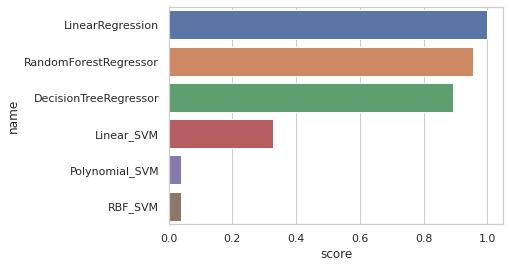

In [15]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)